In [1]:
import numpy as np
import torchvision
import torch
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import math
from IPython.display import clear_output
from tqdm.notebook import tqdm
from scipy.ndimage import gaussian_filter
import scipy.signal as sps
import matplotlib.ticker as ticker
import pandas as pd
from scipy import stats
from torch.optim.lr_scheduler import ReduceLROnPlateau
%matplotlib inline

In [13]:
from os import listdir

files_intersec = listdir("./data_intersec")
files_non_intersec = listdir("./data_non_intersec")

In [39]:
ca1 = []
ca3 = []
for i in range(6):
    ca1k = []
    ca3k = []
    for file in files_intersec:
        if "ca1_" + str(i) in file:
            ca1k.append(np.load("./data_intersec/" + file))
        if "ca3_" + str(i) in file:
            ca3k.append(np.load("./data_intersec/" + file))
    for file in files_non_intersec:
        if "ca1_" + str(i) in file:
            ca1k.append(np.load("./data_non_intersec/" + file))
        if "ca3_" + str(i) in file:
            ca3k.append(np.load("./data_non_intersec/" + file))
    ca1.append(ca1k)
    ca3.append(ca3k)
    

In [40]:
def gausFilter(signal, sigma = 35):
    min1 = np.min(signal)
    gf = gaussian_filter(signal, sigma)
    min2 = np.min(gf)
    return gf*min1/min2

In [41]:
for i in range(len(ca1)):
    for j in range(len(ca1[i])):
        ca1[i][j] = gausFilter(ca1[i][j])
        
for i in range(len(ca3)):
    for j in range(len(ca3[i])):
        ca3[i][j] = gausFilter(ca3[i][j])
  

In [42]:
universal_ca1 = []
for i in range(len(ca1)):
    ca1k = np.array(ca1[i])
    universal_ca1.append(ca1k.mean(axis=0))
    
universal_ca3 = []
for i in range(len(ca3)):
    ca3k = np.array(ca3[i])
    universal_ca3.append(ca3k.mean(axis=0))

In [43]:
for i in range(len(universal_ca3)):
    print(universal_ca1[i].min())

-0.0010112759634044214
-0.0010552069928304196
-0.0010924969796335272
-0.001084547009901785
-0.0011325164496265752
-0.0011942106251130442


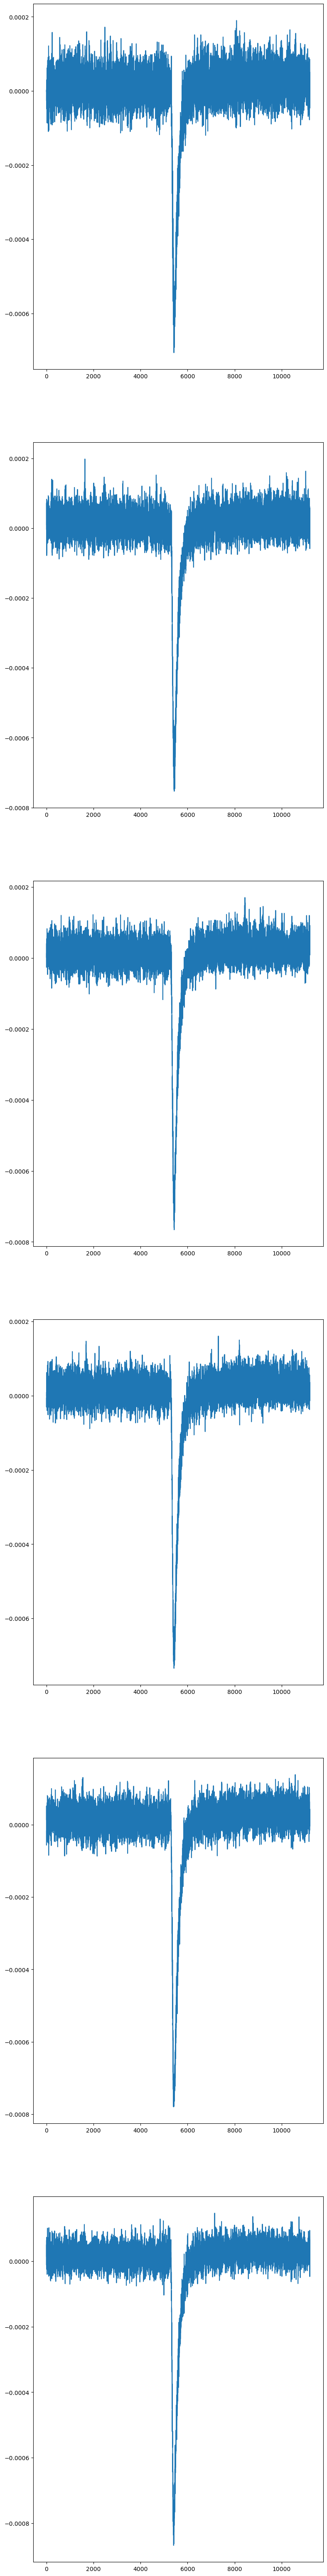

In [38]:
fig = plt.figure(figsize=(9, 80))

for i in range(len(universal_ca1)):
    
    ax = fig.add_subplot(len(universal_ca1), 1, i+1)
    ax.plot(universal_ca1[i])
    #ax.plot(filtered_recs_ca3[i])
    #ax.plot(mean_rec_ca3)    

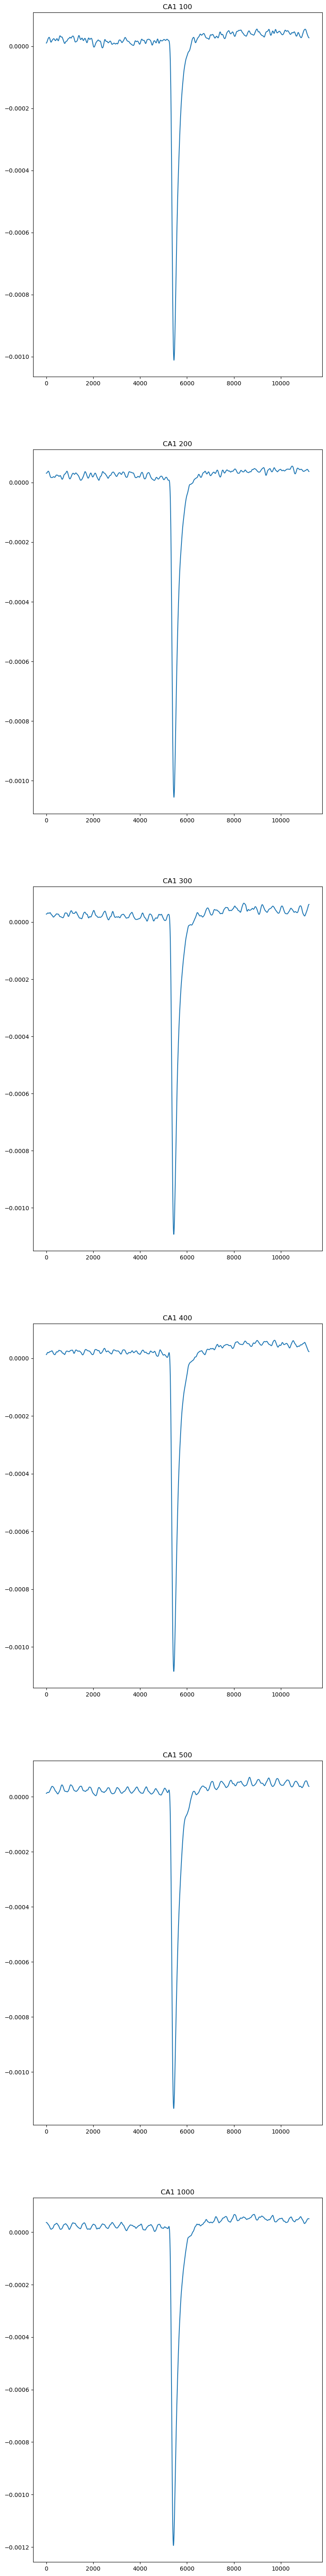

In [46]:
fig = plt.figure(figsize=(9, 80))

for i in range(len(universal_ca1)):
    
    ax = fig.add_subplot(len(universal_ca1), 1, i+1)
    ax.plot(universal_ca1[i])
    if i != 5:
        ax.set_title("CA1 " + str((i+1) * 100))
    else:
        ax.set_title("CA1 1000")
    #ax.plot(mean_rec_ca3)    

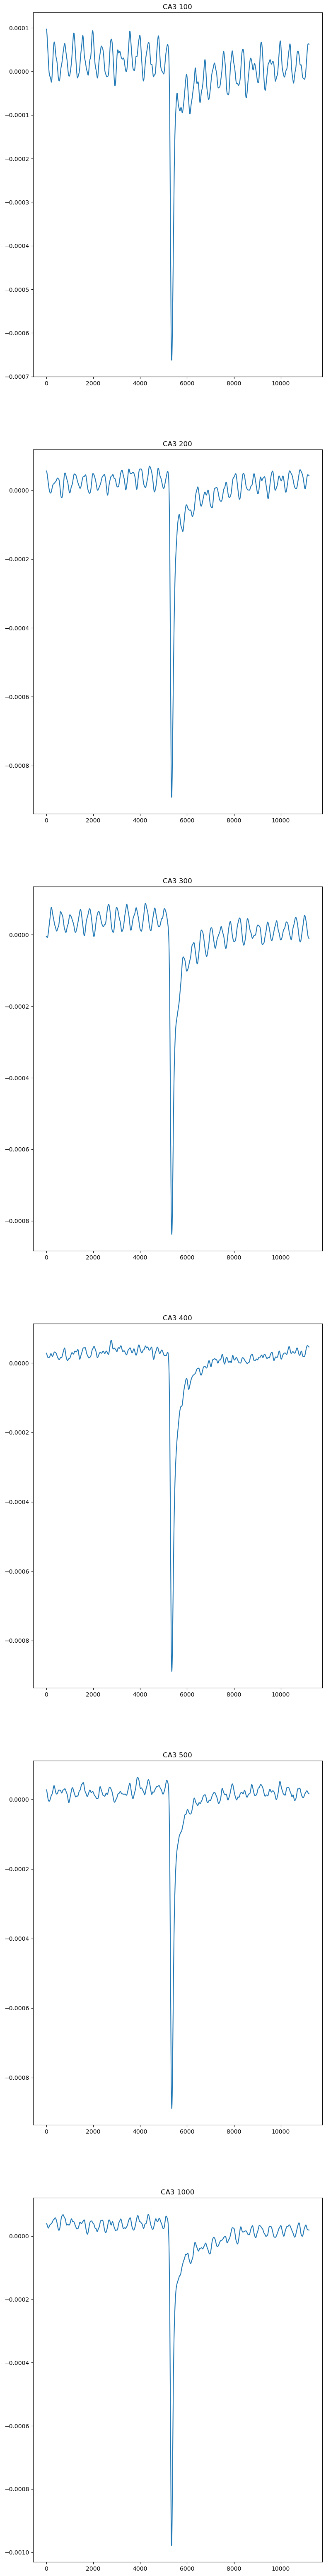

In [47]:
fig = plt.figure(figsize=(9, 80))

for i in range(len(universal_ca3)):
    
    ax = fig.add_subplot(len(universal_ca3), 1, i+1)
    ax.plot(universal_ca3[i])
    if i != 5:
        ax.set_title("CA3 " + str((i+1) * 100))
    else:
        ax.set_title("CA3 1000")  

In [49]:
for i, signal in enumerate(universal_ca1):
    if i != 5:
        np.savetxt("./Universal Signals/universal_signal_ca1_" + str((i+1)*100), signal)
    else:
        np.savetxt("./Universal Signals/universal_signal_ca1_1000", signal)

for i, signal in enumerate(universal_ca3):
    if i != 5:
        np.savetxt("./Universal Signals/universal_signal_ca3_" + str((i+1)*100), signal)
    else:
        np.savetxt("./Universal Signals/universal_signal_ca3_1000", signal)
                